# Manipuler des fichiers

###### Equipe pédagogique : P. François, M. Genete, C. Toffano-Nioche, E. Jacquemet, G. Le Corguillé, J. Seiler, D. Puthier, T. Denecker et tout le staff

## Format de fichier

Avant toutes choses, parlons d'un format de fichier, le <code>bed</code>.

Au cours de cette semaine, vous aurez l'occasion de rencontrer un grand nombre de formats différents. Voici quelques informations sur celui qui nous intéresse ici :

1. Il contient des annotations avec leurs **coordonnées (début/fin) génétiques**.
2. Les coordonnées sont toujours données par rapport au brin +. C'est la colonne "sens" qui vous indique si votre annotation est sur le brin direct (+) ou reverse (-).
3. Son nom signifie **Browser Extensible Format**
4. Il peut être au format BED6 ou BED12 (pour les plus courants). Le BED6 contient 6 colonnes et le BED12... 12 !
5. Les coordonées sont dites en "zero-based, half-open" \[0,n) en opposition à l'"intervalle clos" [1,n]

Par exemple :

<code>chr1   100   200    peak_1    123    +</code>

Il faut lire que :
- sur le chromosome "chr1", 
- entre les positions \[100,200), 
- se trouve l'élément génétique nommé "peak_1". 
- Il a un score de 123 et est porté par le brin sens (+)

Ceci est le stric minimum à comprendre pour notre TP. Si vous souhaitez plus d'informations sur ce format, vous pouvez consulter ce [lien](http://genome.ucsc.edu/FAQ/FAQformat.html#format1).

## Télécharger un fichier 

Afin de pouvoir manipuler des fichiers, nous allons télécharger un fichier BED. 

Il est possible d'utiliser la commande <code>wget</code> pour récupérer un fichier à partir d'un lien.

Votre mission si vous l'acceptez : 
1. Rendez-vous dans le dossier <code>chip-seq</code> que nous avons créé précédemment.
2. Créez un dossier <code>bed</code>.
3. Déplacez vous dans ce dossier <code>bed</code>.
4. Télécharger le fichier à l'adresse suivante : https://zenodo.org/record/5716151/files/hg38_exons.bed.gz

In [ ]:
# Se rendre dans le répertoire chip-seq


In [ ]:
# Créer le dossier bed

# Se rendre dans le dossier bed


In [ ]:
# Télécharger le fichier


## Décompresser un fichier

Pour connaître le type de fichier, il est possible d'utiliser la commande <code>file</code>.

Utilisation : <code>file votre_fichier</code>.

Quel est le type du fichier que nous venons de télécharger ?

In [ ]:
# Afficher le type du fichier hg38_exons.bed.gz


Il semble donc qu'il soit compressé.

Afin de le décompresser, il existe l'outil <code>gunzip</code> (à condition qu'il ait été compressé par l'outil <code>gzip</code>)

L'usage est classique : <code>gunzip fichier.gz</code>.

##### N.B. : Un fichier compressé est beaucoup plus petit qu'un fichier non compressé. D'où leur nom. Rare sont les fichiers zippés par plaisir. Avant de les décompresser, assurez vous que cela soit nécessaire. Beaucoup d'outils acceptent les fichiers compressés en entrée.

Pour celui-ci, pas de souci à le décompresser, alors essayons.

In [ ]:
# Décompression du fichier hg38_exons.bed.gz


Affichez le contenu du dossier pour voir ce qu'est devenu notre fichier

In [ ]:
# Listing du dossier


On voit que le fichier a perdu son extension <code>.gz</code>.

Vérifions maintenant son type à nouveau.

In [ ]:
# Type du fichier


Il n'est plus compressé et correspond à un fichier texte.

## Visualiser un fichier

Nous voudrions visualiser notre fichier fraichement chargé pour comprendre ce qu'il contient. 

Voici d'abord trois commandes utiles et utilisables dans ce jupyter notebook :

- <code>head</code> : Affiche les 10 premières lignes du fichier.
- <code>tail</code> : Affiche les 10 dernières lignes du fichier.

--> Tous deux viennent avec l'option très utile <code>-n</code> qui vous permet de spécifier le nombre de lignes souhaitées s'il est différent de 10.

- <code>cat</code> : Affiche l'ensemble du fichier. Utilisez le si vous êtes sûrs de ne pas avoir trop de ligne à afficher...

Essayez d'afficher les 10 premières lignes de notre fichier.

In [ ]:
# Affiche les 10 premières lignes du fichier


Maintenant affichez en les 10 dernières lignes.

In [ ]:
# Affiche les 10 dernières lignes du fichier


Ici nous ne pouvons pas tester la commande <code>cat</code> car notre fichier est trop volumineux !

Pour la suite des exemples, nous utiliserons le fichier <code>05_short.bed</code> qui se trouve deux crans plus haut.

Copiez le dans votre dossier courant. 

In [ ]:
# Copier le fichier 05_short.bed qui se trouve deux crans en arrière


Cette fois, essayons la commande <code>cat</code>

In [ ]:
# Afficher tout le fichier


Nous pouvons maintenant dire que notre fichier contient les exons de divers gènes. Plusieurs lignes ayant le même nom d'annotation, cela signifie qu'on a une ligne par exon et plusieurs exons par gène.

Deux autres commandes peuvent être utilisées pour regarder les fichiers mais uniquement dans le terminal :

- <code>more nom_fichier</code> : Permet de parcourir un fichier. Une fois que vous le quittez, toutes les lignes restent affichées.
- <code>less nom_fichier</code> : Permet de parcourir un fichier. Une fois que vous le quittez, toutes les lignes disparaissent.

L'une comme l'autre pourront vous rendre la main en appuyant sur la touche <code>q</code>.

Nous avons deux citations de grands hommes qui ont tenté de nous faire un résumé de la différence entre less et more, nous vous laissons juge.
- Less does more or less the same as more, but rather more than less, I like less more than more (Jacques van Helden)
- Un avantage de less est qu’on peut remonter en arrière; avec more … c’est mort (Marc Deloger)

##### Tips
Lorsque vous utilisez less, vous avez la possibilité d'utiliser quelques raccourcis claviers bien pratiques :
- ↑ : se déplacer vers le haut.
- ↓ : se déplacer vers le bas.
- \> : Aller à la première ligne.
- < : Aller à la dernière ligne.
- /chr : pour chercher le terme ‘chr’ (puis touche ‘enter’).
- n : (next) pour chercher la prochaine occurrence de notre pattern, dans l'exemple 'chr'.
- p: (previous) pour chercher l’occurrence précédente de ‘truc’.
- q : pour quitter.

## Compter les lignes d'un fichier

Parmi les petites commandes bien utiles au quotidien, nous retrouvons la commande <code>wc</code> qui, par défaut, permet de compter le nombre de lignes, de mots et d'octets contenus dans un fichier.

Si on ne souhaite pas afficher toutes ces informations, on peut utiliser les options :
- <code>-l</code> : pour afficher le nombre de lignes
- <code>-w</code> : pour afficher le nombre de mots
- <code>-c</code> : pour afficher le nombre d'octets

Combien nos fichiers <code>hg38_exons.bed</code> et <code>05_short.bed</code> contiennent-ils de lignes ? Pour notre fichier complet, si nous reformulons cette question, sachant que chaque ligne contient un exon : Combien d'exons contient notre génome hg38 ?

In [ ]:
# Compter le nombre de lignes     


## Extraire une colonne

Admettons qu'un fichier contiennent trop d'informations et que nous sachions que seules quelques colonnes nous suffiraient, la commande <code>cut</code> sera particulièrement utile.

<code>cut</code> prend nécessairement une option pour savoir quoi couper. 

Celle que vous verrez le plus souvent utilisée est <code>-f</code> qui permet de couper des colonnes (**f**ields)

Il vous suffira ensuite de spécifier le numéro de la colonne que vous souhaitez couper.

Subtilité des numéros de colonne :
- <code>-f 1</code> : coupe la colonne 1
- <code>-f 1,3</code> : coupe les colonnes 1 **ET** 3
- <code>-f 1-3</code> : coupe les colonnes 1 **À** 3
- <code>-f 3-</code> : coupe les colonnes 3 **jusqu'à la fin** (Ici 3, 4, 5 et 6)
- <code>-f -3 </code> : coupe les colonnes **depuis le début** jusqu'à 3 (Donc 1, 2 et 3)

Attention, <code>cut</code> conserve l'ordre d'origine des colonnes, que vous écriviez <code>-f 2,3</code> ou <code>-f 3,2</code>, ne changera donc rien.

Essayez de sortir la première colonne du fichier <code>05_short.bed</code> puis les colonnes à partir de la colonne 4 du même fichier.

In [ ]:
# On extrait la colonne 1

cut -f1 05_short.bed 


In [ ]:
# On ajoute un echo qui affiche quelques pointillés pour séparer visuellement nos deux sorties
echo "-------"
# Puis les colonnes à partir de la 4
cut -f4- 05_short.bed 

In [ ]:
pwd

## Trier un fichier

Autre commande pratique : <code>sort</code> qui permet de trier votre fichier.

Par défaut, le fichier sera trié selon la première colonne par ordre alphabétique.

Si nous préférons une autre colonne ou un autre ordre, comme toujours, des options existent !

- <code>-k</code> : Permet d'indiquer la colonne de tri. Attention de bien l'écrire, par exemple pour trier sur la colonne 2, il faudra écrire <code>-k 2,2</code>. 
De la sorte on indique que le tri se fait de la colonne 2 à la colonne 2.
- <code>-k 2,2nr</code> : Permet de trier la colonne 2 par ordre **n**umérique (entiers) et en ordre inverse (**r**everse)
- <code>-k 2,2g</code> : Permet de trier la colonne 2 par valeurs numériques **décimales**. (Le g vient du nom complet de cette option : --**g**eneral-numeric-sort)

Triez le fichier <code>05_short.bed</code> selon l'ordre alphabétique de la colonne contenant les annotations (colonne 4)

In [ ]:
# Tri selon la colonne 4


Triez le même fichier mais en respectant l'ordre génétique, donc d'abord en tri alphabétique de la colonne 1 puis l'ordre numérique de la colonne 2.

In [ ]:
# Tri selon les colonnes 1 et 2 (2 en ordre numérique)


## Retirer des doublons d'un fichier

Il arrive que plusieurs lignes parfaitement identiques existent dans un fichier.

La commande <code>uniq</code> permet d'éliminer cette redondance.

##### Attention
Si deux lignes identiques existent mais ne se suivent pas, <code>uniq</code> ne les enlevera pas !

Affichez les 5 dernières lignes du fichier <code>05_short.bed</code> pour bien noter la redondance.

In [ ]:
# Affiche les 5 premières lignes du fichier


Utilisez la commande <code>uniq</code> pour éliminer cette redondance. 

In [ ]:
# Afficher les lignes de façon unique


La commande <code>uniq</code> possède une option qui permet de savoir combien d'itérations ont été condensées <code>-c</code> (**c**ount). Essayez de la rajouter.

In [ ]:
# Afficher les lignes de façon unique en comptant le nombre d'itérations condensées


## Le ctrl + f de la ligne de commande
##### Mais en mieux

Cette dernière commande est <code>grep</code>. Elle permet l'équivalent d'un _ctrl + f_ et affiche toutes les lignes contenant l'expression recherchée (aussi appelée "motif").

Elle s'écrit <code>grep "ce que nous cherchons" fichier</code>. Par défaut, la commande est sensible à la casse.

Son **man**uel est particulièrement rempli car il est possible de faire de nombreuses choses, telles que :
- <code>-f</code> : Rechercher chaque motif d'un fichier dans un autre fichier
- <code>-i</code> : Ignorer la casse
- <code>-v</code> : Rechercher toutes les lignes qui ne contiennent pas notre expression
- <code>-c</code> : Afficher le nombre de ligne contenant le motif

Affichez les lignes contenant le mot "protein" du fichier <code>05_short.bed</code>.

In [ ]:
# Recherche le motif "protein"


Sans les compter à la main, combien y a-t-il de lignes concernées ?

In [ ]:
# Savoir combien de ligne contient le motif "protein"


## Redirections

Depuis le début nous affichons beaucoup de chose dans ce fichier. Mais parfois on a besoin de stocker le résultat obtenu ou encore de faire deux commandes à la suite.

Par exemple, si je veux savoir combien de chromosomes sont annotés dans mon fichier, je dois d'abord isoler la première colonne, puis la trier et enfin enlever la redondance. Mais comment faire ?

Il faut voir chaque outil comme un processus de transformation.
- En entrée, dite **entrée standard**, on met un fichier ou du texte (un **flux** de texte)
- Dans le processus de transformation, la commande fait ce qu'on a demandé
- En sortie, deux options :
    - Tout va bien, c'est la **sortie standard**, aussi nommée stdout
    - Il y a une erreur, c'est la **sortie erreur**, aussi nommée stderr

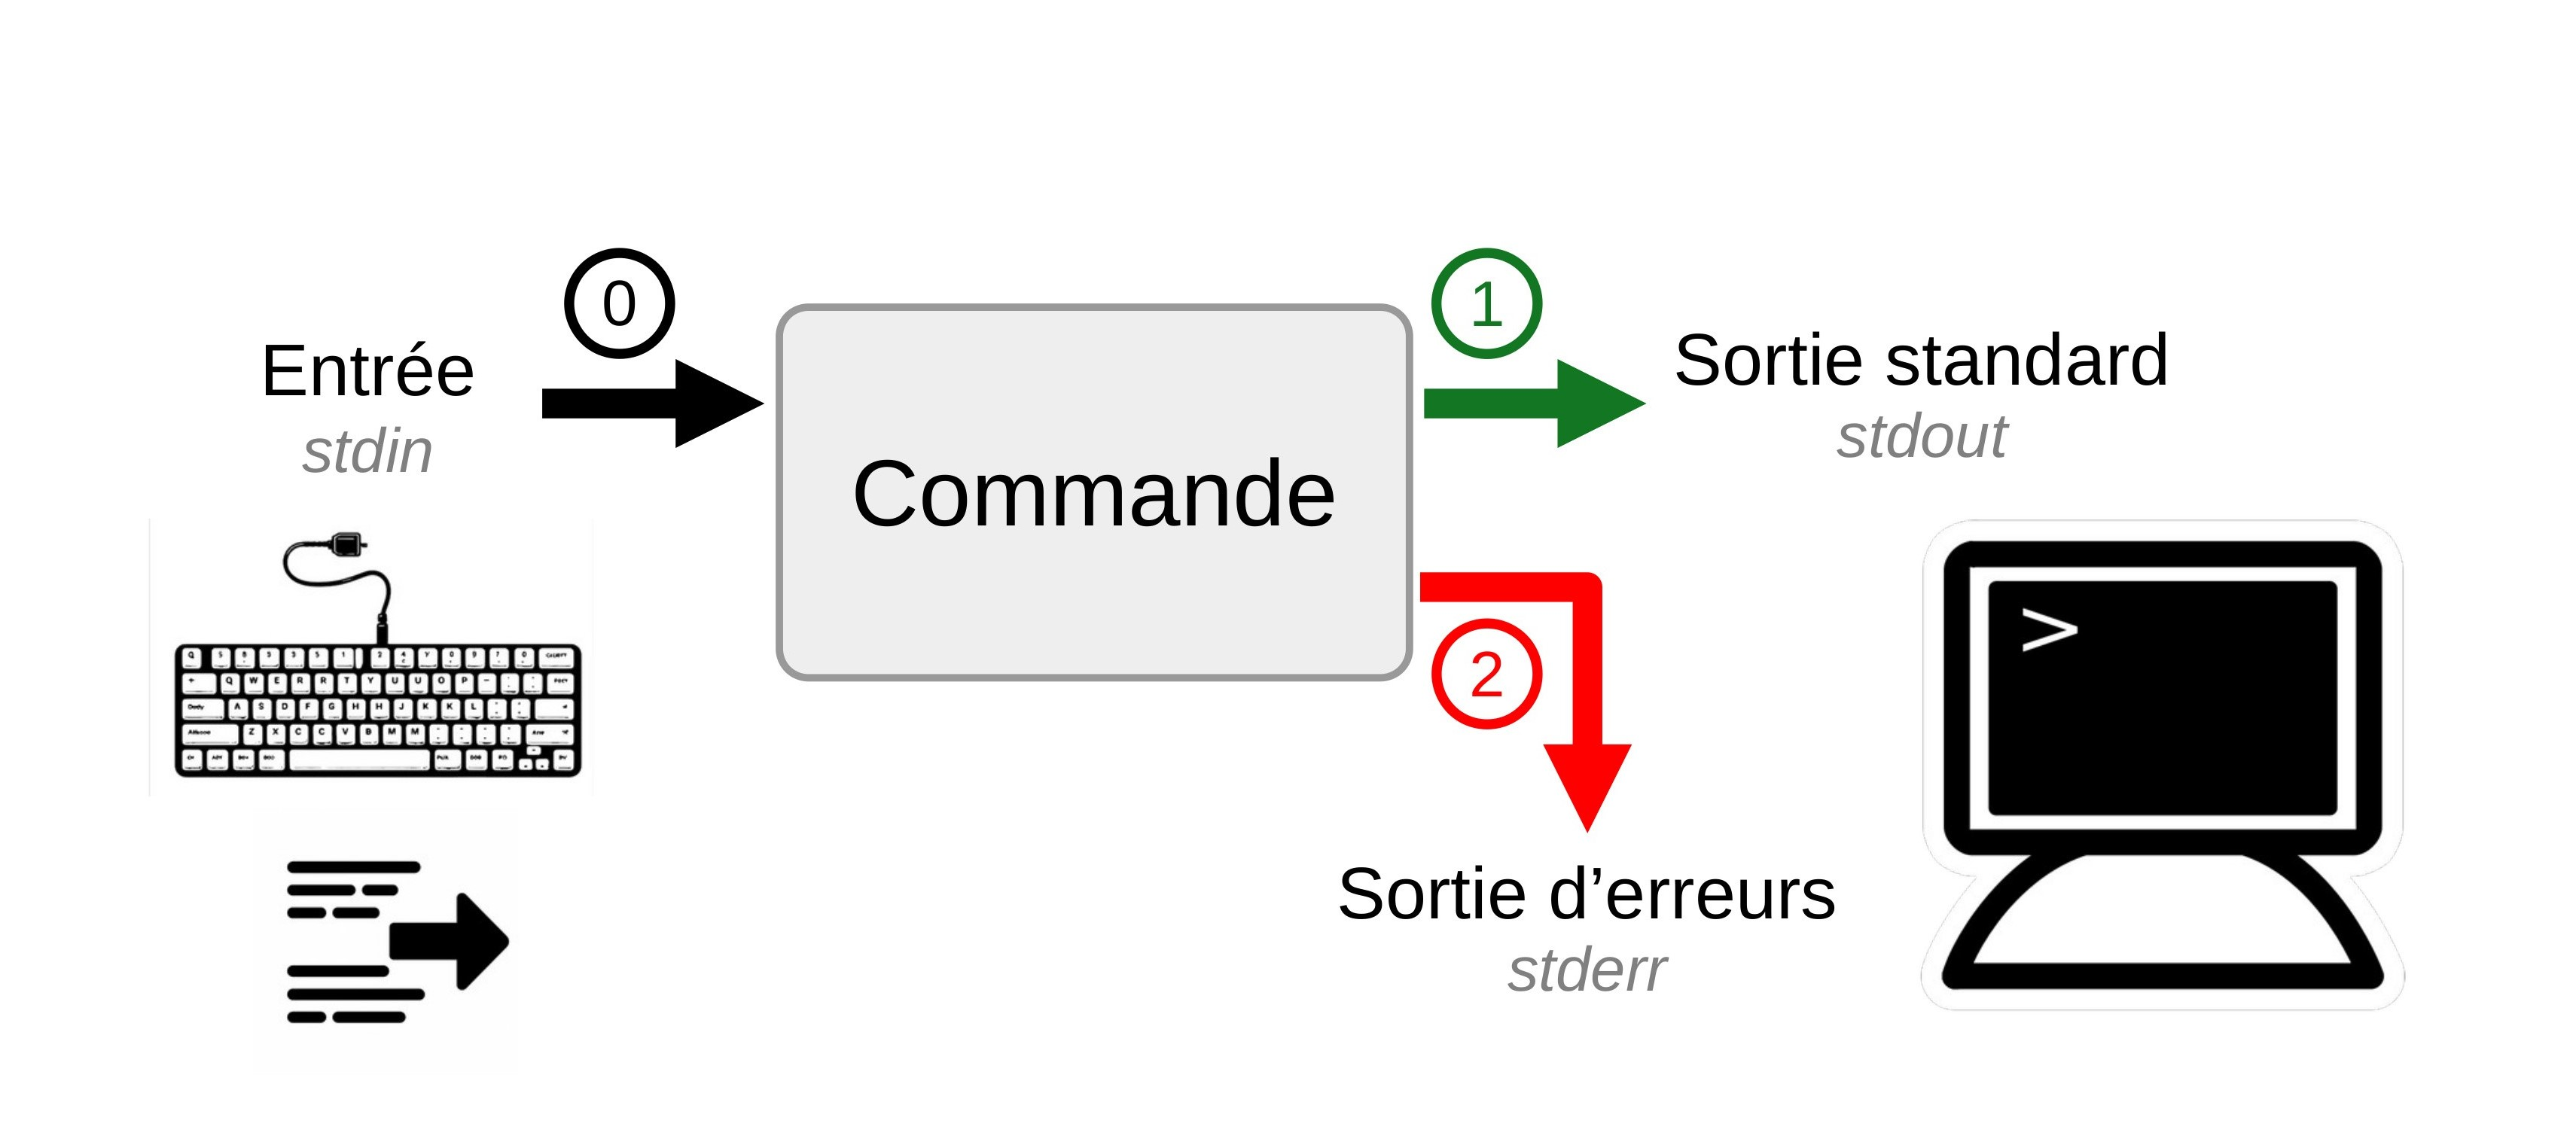

Quelques soient les sorties (standard ou erreur), elles peuvent être écrites dans un fichier plutôt qu'affichées à l'écran :
- Pour la sortie standard, on utilise le caractère <code>\></code> ou <code>1></code> en fin de ligne, suivi du nom du fichier où l'on va la stocker : <code>commande > fichier_sortie.txt</code>. Si on souhaite stocker de l'information à la suite d'un fichier déjà existant, on double le caractère <code>\>\></code>. Par exemple : <code>commande >> fichier_sortie_existant.txt</code>

- Pour la sortie erreur, on utilise <code>2></code> en fin de ligne, suivi du nom du fichier d'erreur où l'on va la stocker : <code>commande 2> fichier.log</code>

- Pour stocker les deux, on utilise <code>&></code> suivi du nom du fichier de stockage : <code>commande &> fichier_standard_et_erreur.txt</code>

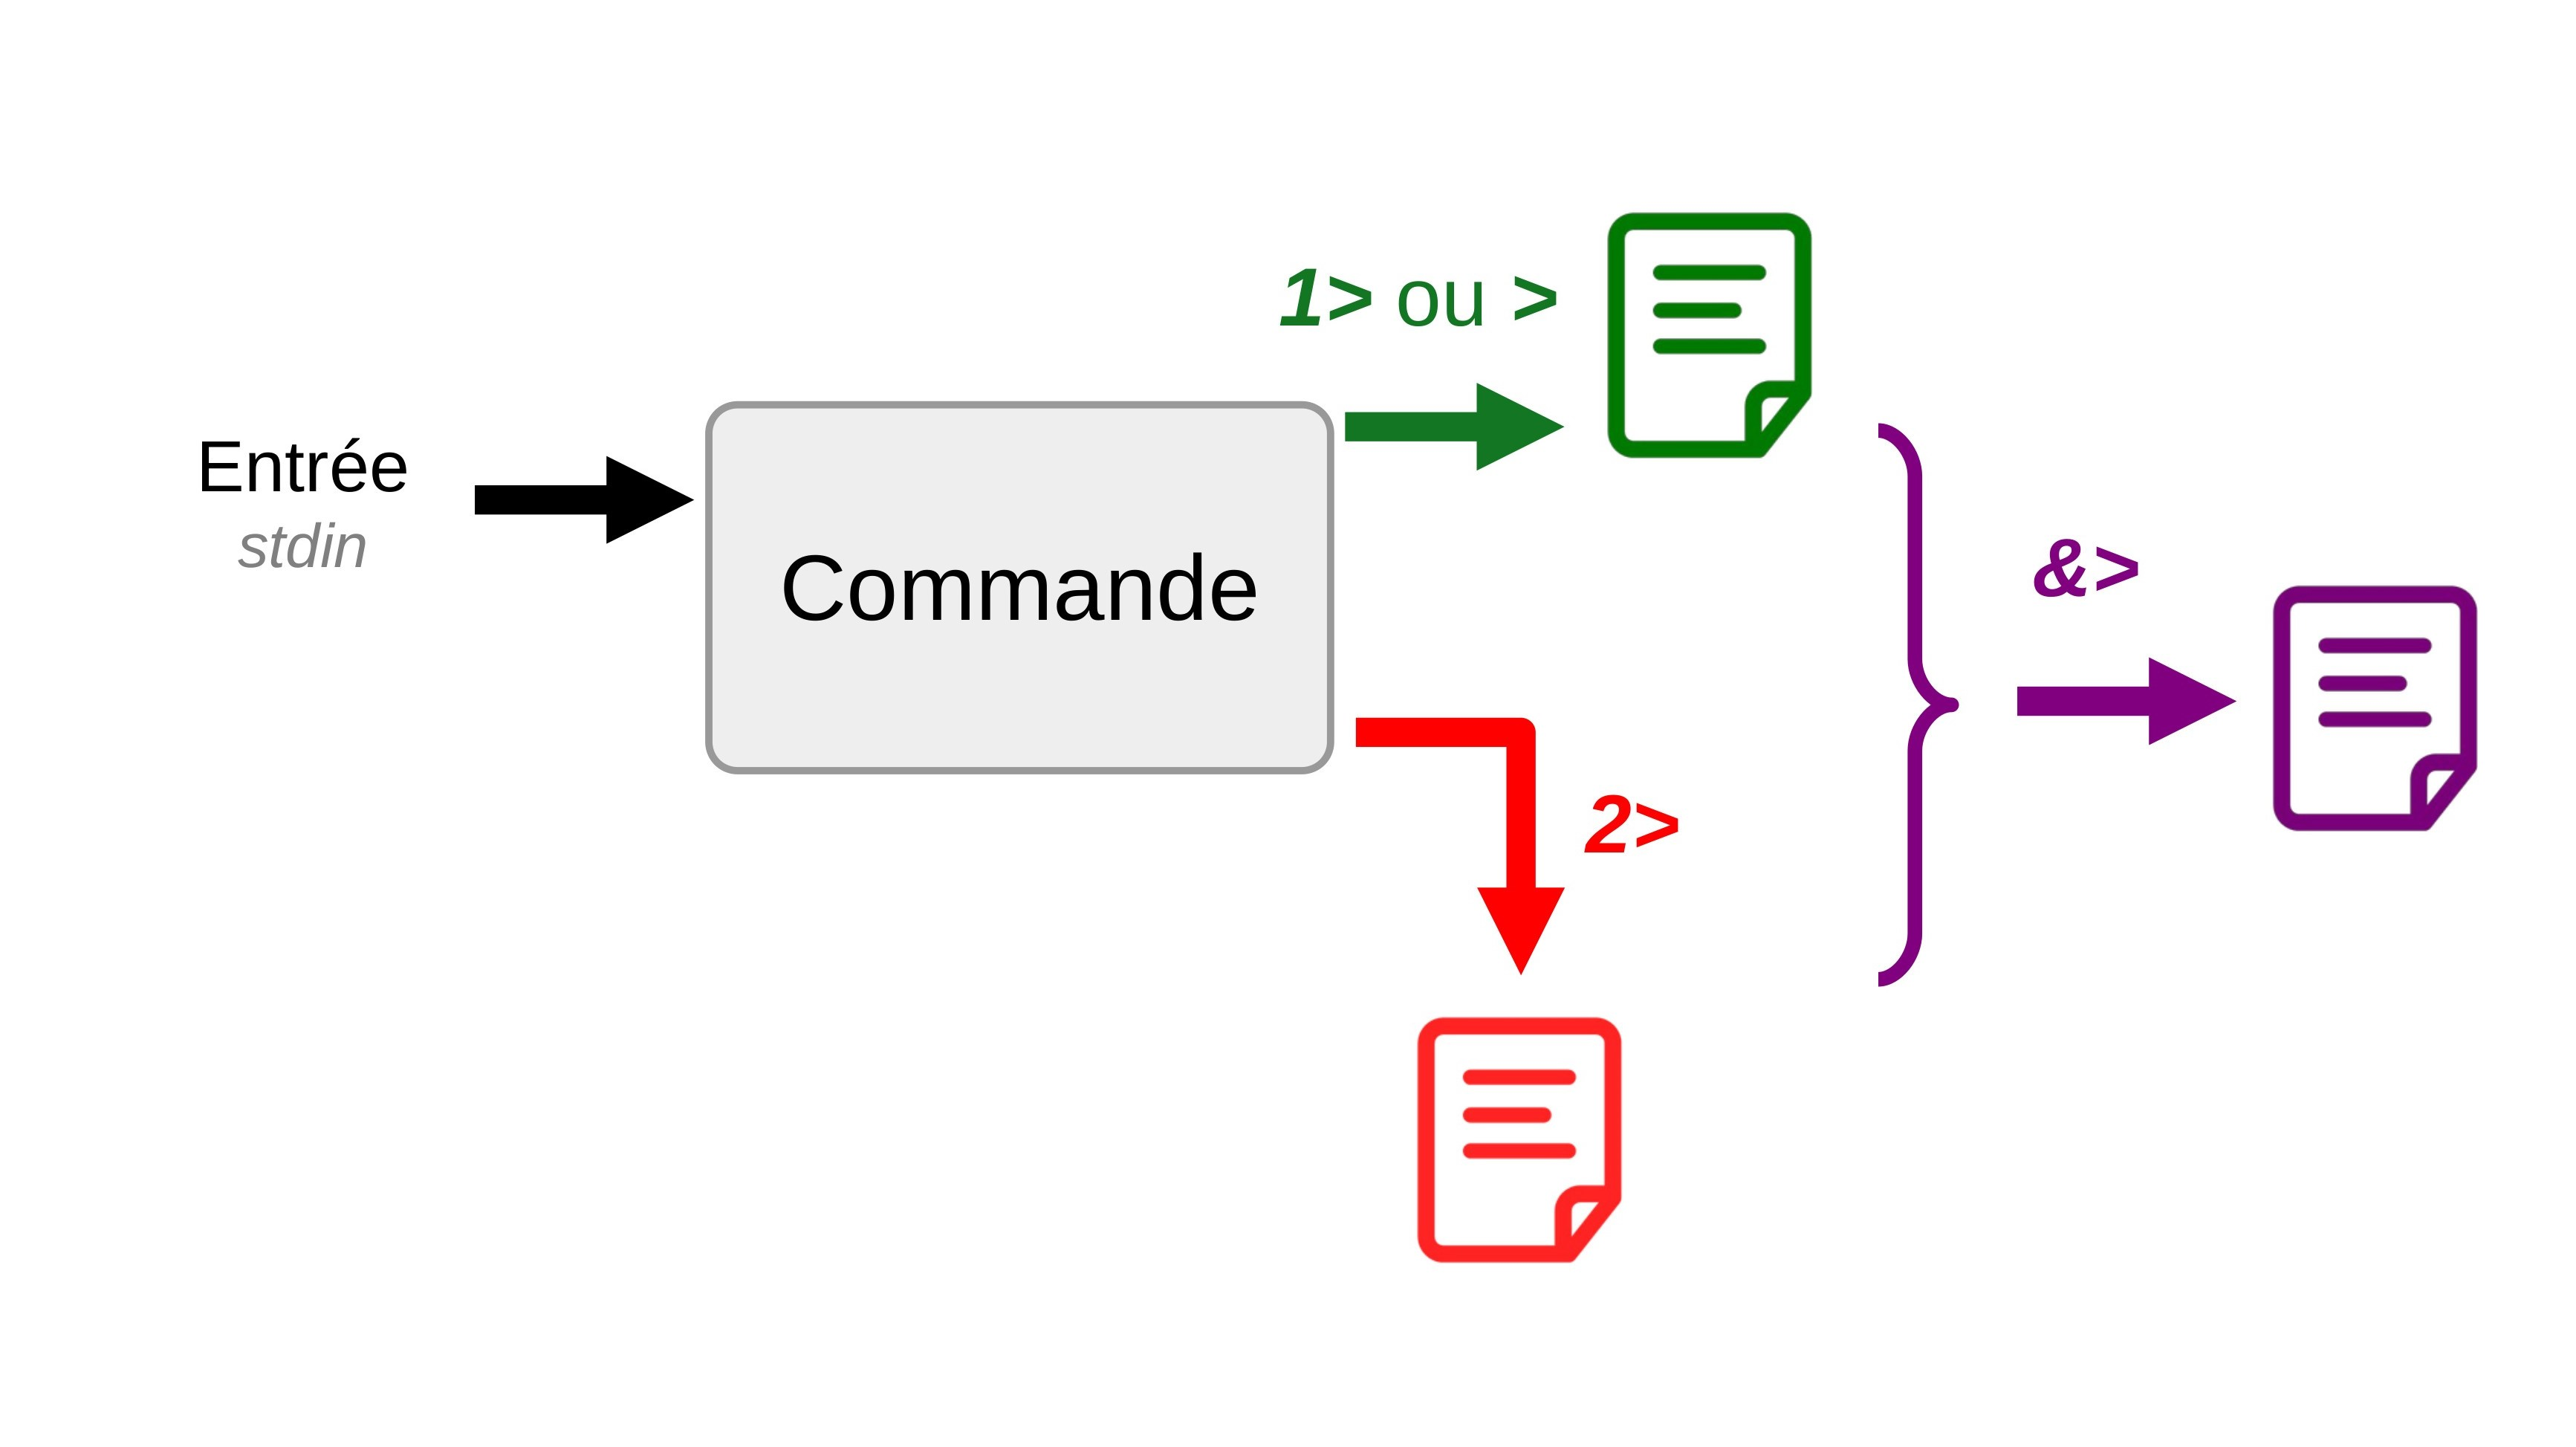

Si on souhaite utiliser directement la sortie standard, cette dernière peut devenir l'entrée standard d'une autre commande (Comme c'est pratique !).

C'est comme si vous associiez deux processus par un pipe (tube) leur permettant de passer les données de l'un à l'autre. Pour cela, on utilise le **caractère <code>|</code>** pour séparer les deux commandes.

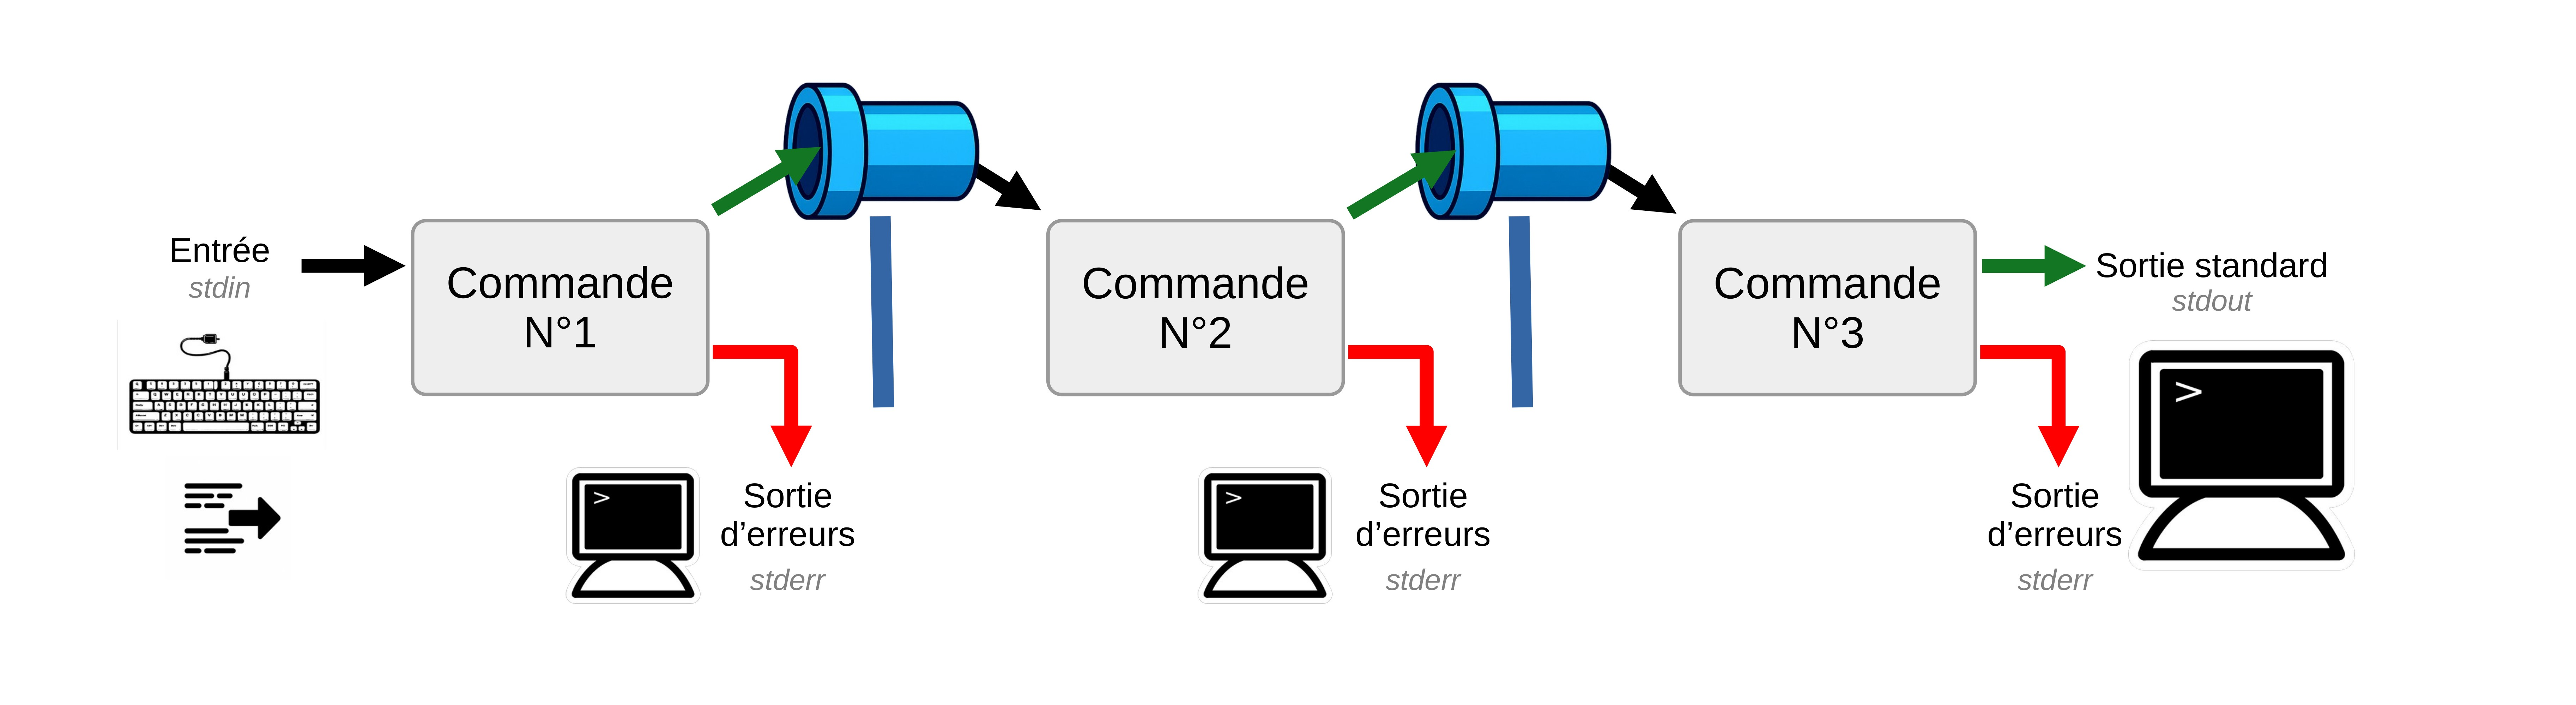

Essayons ensemble ! Combien de fichiers ai-je dans mon dossier courant ?

Etape 1 :
<details><summary></summary>

1. Lister les fichiers présents dans mon dossier

</details>

Etape 2 :
<details><summary></summary>

2. Compter le nombre de lignes affichées

</details>

In [ ]:
# Définir le nombre de fichier d'un dossier sans les compter à la main


Autre exemple : Donnez la liste non redondante des chromosomes présents dans le fichier <code>hg38_exons.bed</code>

Etape 1 :
<details><summary></summary>

1. Isolez la colonne 1 du fichier qui contient le nom des chromosomes

</details>

Etape 2 :
<details><summary></summary>

2. Triez la sortie

</details>

Etape 3 :
<details><summary></summary>

3. Enlevez la redondance

</details>

En résumé :
<details><summary></summary>

Enchainez les commandes <code>cut</code>, <code>sort</code> et <code>uniq</code>

</details>

In [ ]:
# Afficher une liste d'information non redondante


Et si vous souhaitiez savoir combien vous possédez d'itérations pour chaque chromosome ?

In [ ]:
# Afficher une liste d'information non redondante avec l'information du nombre d'itérations


Une dernière pour la route, version hard core !

Dans le fichier <code>hg38_exons.bed</code>, sur le chromosome 22, combien y a-t-il de gènes codants uniques ? Stockez le résultat dans un fichier nommé <code>nb_gene.txt</code>

Etape 1 :
<details><summary></summary>

1. Recherchez les lignes contenant "chr22"

</details>

Etape 2 :
<details><summary></summary>

2. Dans les lignes sélectionnées, cherchez celles contenant "protein_coding"

</details>

Etape 3 :
<details><summary></summary>

3. Conservez la colonne contenant les noms de gènes (colonne 4)

</details>

Etape 4 :
<details><summary></summary>

4. Triez les lignes

</details>

Etape 5 :
<details><summary></summary>

5. Retirez la redondance

</details>

Etape 6 :
<details><summary></summary>

6. Comptez le nombre de ligne

</details>

Etape 7 :
<details><summary></summary>

7. Stockez le tout dans un fichier <code>nb_gene.txt</code>

</details>

En résumé :
<details><summary></summary>

Enchainez les commandes <code>grep</code>, <code>grep</code> à nouveau, <code>cut</code>, <code>sort</code>, <code>uniq</code> et <code>wc</code>.

</details>

In [ ]:
# Déterminer le nombre de gène unique sur le chromosome 22 dans le fichier


## The end

Bravo d'être arrivés jusqu'ici, vous avez mérité votre pause !